# Description of methodology
# Classification algorithms
# ADAptive LInear NEuron (Adaline)
From [Python Machine Learning - Second Edition By Sebastian Raschka, Vahid Mirjalili](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition)

In this section, we will take a look at another type of single-layer neural network: **ADAptive LInear NEuron (Adaline)**. Adaline was published by Bernard Widrow and his doctoral student Tedd Hoff, only a few years after Frank Rosenblatt's perceptron algorithm, and can be considered as an improvement on the latter. (Refer to [An Adaptive "Adaline" Neuron Using Chemical "Memistors", Technical Report Number 1553-2, B. Widrow and others](http://www-isl.stanford.edu/~widrow/papers/t1960anadaptive.pdf), Stanford Electron Labs, Stanford, CA, October 1960).

## Minimizing continuous cost functions
The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous cost functions. This lays the groundwork for understanding more advanced machine learning algorithms for classification, such as logistic regression, support vector machines, and regression models.

The **key difference between the Adaline** rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the **weights are updated based on a linear activation function rather than a unit step function** like in the perceptron. In Adaline, this linear activation function $\phi(z)$ is simply the identity function of the net input, so that:

$ \phi ( \boldsymbol{w}^T \boldsymbol{x} ) = \boldsymbol{w}^T \boldsymbol{x} $

While the linear activation function is used for learning the weights, we still use a threshold function to make the final prediction, which is similar to the unit step function that we have seen earlier. The main differences between the perceptron and Adaline algorithm are highlighted in the following figure:

![adaline](img/adaline_dag.jpg)

The illustration shows that the Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.

## Minimizing cost functions with gradient descent
One of the key ingredients of supervised machine learning algorithms is a defined **objective function** that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. In the case of Adaline, we can define the cost function $J$ to learn the weights as the **Sum of Squared Errors (SSE)** between the calculated outcome and the true class label:

$ J ( \boldsymbol{w} ) = \frac{1} {2} \sum_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) ^2 $

The term $\frac{1} {2}$ is just added for our convenience, which will make it easier to derive the gradient, as we will see in the following paragraphs. **The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the cost function becomes differentiable.** Another nice property of this cost function is that **it is convex**; thus, we can use a simple yet powerful optimization algorithm called gradient descent to find the weights that minimize our cost function to classify the samples in the Iris dataset.

As illustrated in the following figure, we can describe the main idea behind gradient descent as climbing down a hill until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient where the step size is determined by the value of the learning rate, as well as the slope of the gradient:

![grad_desc](img/grad_desc.jpg)

Using gradient descent, we can now update the weights by taking a step in the opposite direction of the gradient $\nabla J(w)$ of our cost function:

$ \boldsymbol{w} := \boldsymbol{w} + \Delta \boldsymbol{w} $

Where the weight change $\Delta \boldsymbol{w}$ is defined as the negative gradient multiplied by the learning rate $\eta$:

$ \Delta \boldsymbol{w} = - \eta \nabla J (\boldsymbol{w}) $

To compute the gradient of the cost function, we need to compute the partial derivative of the cost function with respect to each weight $w_j$:

$ \frac{ \partial{J} } { \partial{w_j} } = - \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j^{(i)} $

The full derivation can be obtained using the Chain Rule of differentiation:

$\frac{ \partial{J} } { \partial{w_j} } =
\frac{\partial} {\partial{w_j}} \frac{1} {2} \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) ^2 =
\frac{1} {2} \frac{\partial} {\partial{w_j}} \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) ^2 =
\frac{1} {2} \sum \limits_i 2 \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) \frac{\partial} {\partial{w_j}} \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) =
\sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) \frac{\partial} {\partial{w_j}} \left( y^{(i)} - \sum \limits_i \left( w_j^{(i)} x_j^{(i)} \right) \right) =
\sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) \left( - x_j^{(i)} \right) =
-\sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j^{(i)}$


So that we can write the update of weight $w_j$ as:

$ \Delta w_j = - \eta \frac{ \partial{J} } { \partial{w_j} } = \eta \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)} \right) \right) x_j^{(i)}$

Since we update all weights simultaneously, our Adaline learning rule becomes:

$ \boldsymbol{w} := \boldsymbol{w} + \Delta \boldsymbol{w} $

Although the Adaline learning rule looks identical to the perceptron rule, we should note that the $\phi \left( z^{(i)} \right)$ with  is a real number and not an integer class label. Furthermore, the weight update is calculated based on all samples in the training set (instead of updating the weights incrementally after each sample), which is why this approach is also referred to as **batch gradient descent**.
## Implementing Adaline in Python
Since the perceptron rule and Adaline are very similar, we will take the perceptron implementation that we defined earlier and change the `fit` method so that the weights are updated by minimizing the cost function via gradient descent.

Instead of updating the weights after evaluating each individual training sample, as in the perceptron, we calculate the gradient based on the whole training dataset via `self.eta * errors.sum()` for the bias unit (zero-weight) and via `self.eta * X.T.dot(errors)` for the weights 1 to m where `X.T.dot(errors)` is a matrix-vector multiplication between our feature matrix and the error vector.

Please note that the `activation` method has no effect in the code since it is simply an identity function. Here, we added the `activation` function (computed via the activation method) to illustrate how information flows through a single layer neural network: features from the input data, net input, activation, and output. Other classifiers, such as logistic regression, use a non-identity, nonlinear activation function. We will see that a logistic regression model is closely related to Adaline with the only difference being its activation and cost function.

Now, similar to the previous perceptron implementation, we collect the cost values in a `self.cost_` list to check whether the algorithm converged after training.

In practice, it often requires some experimentation to find a good learning rate $\eta$ for optimal convergence. So, let's choose two different learning rates, $\eta=0.1$ and $\eta=0.0001$, to start with and plot the cost functions versus the number of epochs to see how well the Adaline implementation learns from the training data.

The learning rate $\eta$ (`eta`), as well as the number of epochs (`n_iter`), are the so-called hyperparameters of the perceptron and Adaline learning algorithms. 

In [1]:
import os
os.chdir('Documents/repos/nhl_draft/')

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data',
                 header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import numpy as np
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

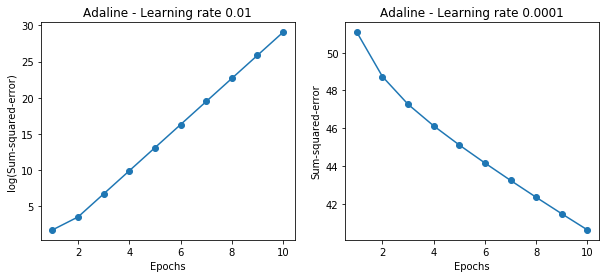

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from src.classifiers import AdalineGD

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), 
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), 
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problem. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate $\eta=0.0001$ is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum.

The following figure illustrates what might happen if we change the value of a particular weight parameter to minimize the cost function $J$. The left subfigure illustrates the case of a well-chosen learning rate, where the cost decreases gradually, moving in the direction of the global minimum. The subfigure on the right, however, illustrates what happens if we choose a learning rate that is too large—we overshoot the global minimum:

![learning_rate](img/learning_rate.jpg)


## Improving gradient descent through feature scaling

Many machine learning algorithms require some sort of feature scaling for optimal performance. Gradient descent is one of the many algorithms that benefit from feature scaling. In this section, we will use a feature scaling method called standardization, which gives our data the property of a standard normal distribution, which helps gradient descent learning to converge more quickly. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1. For instance, to standardize the jth feature, we can simply subtract the sample mean $\mu_j$ from every training sample and divide it by its standard deviation $\sigma_j$:

$ \large{ \boldsymbol{x'}_j = \frac{\boldsymbol{x}_j - \mu_j} {\sigma_j} } $

Here, $\boldsymbol{x}_j$ is a vector consisting of the jth feature values of all training samples n, and this standardization technique is applied to each feature j in our dataset.

One of the reasons why standardization helps with gradient descent learning is that the optimizer has to go through fewer steps to find a good or optimal solution (the global cost minimum), as illustrated in the following figure, where the subfigures represent the cost surface as a function of two model weights in a two-dimensional classification problem:

![standardization](img/standardization.jpg)

Standardization can easily be achieved using the built-in NumPy methods `mean` and `std`:


In [5]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

After standardization, we will train Adaline again and see that it now converges after a small number of epochs using a learning rate $\eta=0.01$:

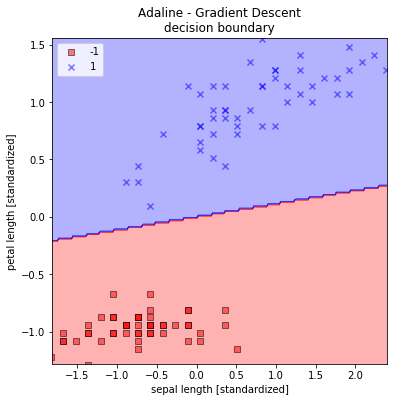

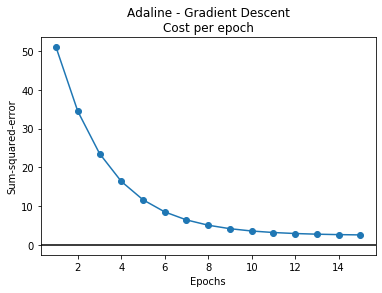

In [8]:
from src.plot_utils import plot_decision_regions

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada,
                      xlabel='sepal length [standardized]',
                      ylabel='petal length [standardized]',
                      title='Adaline - Gradient Descent'
                            '\ndecision boundary')

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.title('Adaline - Gradient Descent'
          '\nCost per epoch')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.axhline(0, color='black')
plt.show()

As we can see in the plots, Adaline has now converged after training on the standardized features using a learning rate $\eta=0.01$. However, note that the SSE remains non-zero even though all samples were classified correctly.
